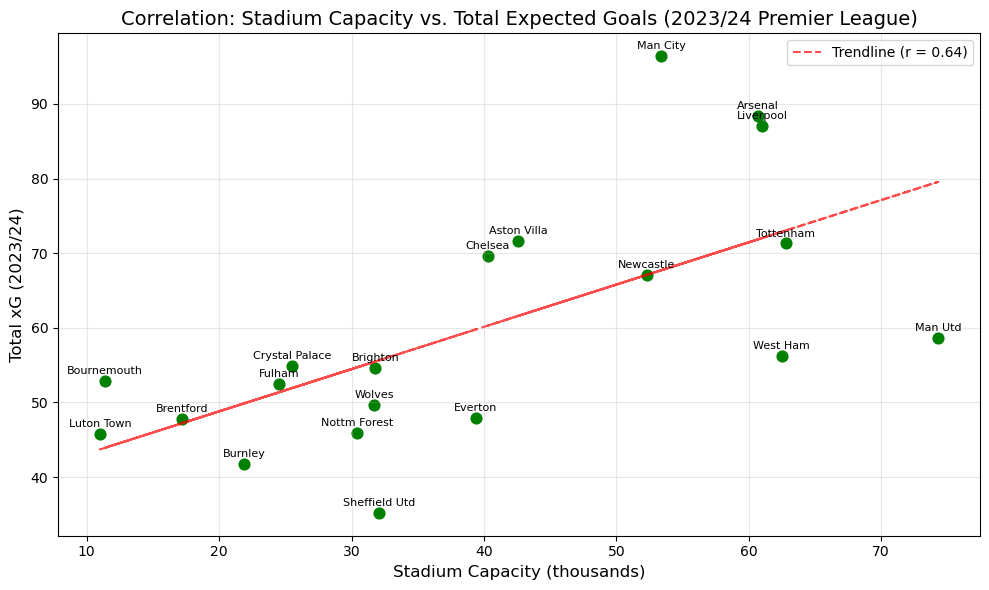

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the 2023/24 Premier League season (Capacity in thousands)
stadium_capacity = [53.4, 60.7, 61.0, 42.6, 62.8, 40.3, 52.3, 74.3, 62.5, 25.5, 
                    31.8, 11.4, 24.5, 31.7, 39.4, 17.2, 30.4, 11.0, 21.9, 32.1]
total_xg = [96.4, 88.4, 87.0, 71.6, 71.3, 69.6, 67.1, 58.6, 56.2, 54.9, 
            54.6, 52.9, 52.5, 49.6, 47.9, 47.8, 45.9, 45.8, 41.8, 35.2]
teams = ['Man City', 'Arsenal', 'Liverpool', 'Aston Villa', 'Tottenham', 'Chelsea', 
         'Newcastle', 'Man Utd', 'West Ham', 'Crystal Palace', 'Brighton', 'Bournemouth', 
         'Fulham', 'Wolves', 'Everton', 'Brentford', 'Nottm Forest', 'Luton Town', 
         'Burnley', 'Sheffield Utd']

# Calculate correlation coefficient manually
capacity_mean = np.mean(stadium_capacity)
xg_mean = np.mean(total_xg)

numerator = sum((c - capacity_mean) * (x - xg_mean) for c, x in zip(stadium_capacity, total_xg))
denom_capacity = np.sqrt(sum((c - capacity_mean) ** 2 for c in stadium_capacity))
denom_xg = np.sqrt(sum((x - xg_mean) ** 2 for x in total_xg))

correlation = numerator / (denom_capacity * denom_xg)

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(stadium_capacity, total_xg, color='green', s=60)

# Add team labels for context
for i, team in enumerate(teams):
    plt.annotate(team, (stadium_capacity[i], total_xg[i]), 
                 textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

# Add trendline
z = np.polyfit(stadium_capacity, total_xg, 1)
p = np.poly1d(z)
plt.plot(stadium_capacity, p(stadium_capacity), "r--", alpha=0.7, 
         label=f'Trendline (r = {correlation:.2f})')

plt.xlabel('Stadium Capacity (thousands)', fontsize=12)
plt.ylabel('Total xG (2023/24)', fontsize=12)
plt.title('Correlation: Stadium Capacity vs. Total Expected Goals (2023/24 Premier League)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()